# FAA Summer Capstone
This capstone project involved looking at flight data from April 2022 to April 2023. Our goal was to see if we could determine which airports best dealt with delays.

# Dataset Manipulation and Reading in Packages

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib.dates as mdates


In [4]:
import scipy.stats as stats

## Delay Reason Exploration
Creating dataframes that allowed me to better analyze delay reason data.

In [5]:
#Reading in the initial dataset and filtering by top 10 airports

faa_df= pd.read_csv("faa_airports_all_thin.csv").fillna(0)
faa_df=faa_df[faa_df["Origin"].isin(["ATL","DFW","DEN","ORD","LAX","CLT","MCO","LAS","PHX","MIA"])]
faa_df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,IATA_Code_Marketing_Airline,Origin,Dest,CRSDepTime,DepTime,...,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,Div1AirportID
1,2022,4,3,7,2022-04-03,UA,ORD,GRR,710,705.0,...,65.0,1,137,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,4,3,7,2022-04-03,UA,ORD,MDT,1400,1352.0,...,114.0,1,594,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022,4,3,7,2022-04-03,UA,ORD,SYR,1035,1027.0,...,102.0,1,607,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2022,4,3,7,2022-04-03,UA,DEN,LIT,952,950.0,...,125.0,1,771,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2022,4,3,7,2022-04-03,UA,DEN,XNA,1544,1538.0,...,91.0,1,616,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Subsetting data down to the delay related columns, flights and airports
delay_data=faa_df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FlightDate","Month","Origin","Flights"]]
delay_data[1:10]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightDate,Month,Origin,Flights
4,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,ORD,1
5,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,ORD,1
10,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,DEN,1
13,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,DEN,1
14,0.0,0.0,0.0,0.0,0.0,2022-04-02,4,MCO,1
15,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,DEN,1
20,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,DEN,1
23,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,DEN,1
24,0.0,0.0,0.0,0.0,0.0,2022-04-03,4,DEN,1


In [7]:
# Pivoting the data to long format for creating visuals
delay_long=delay_data.melt(id_vars=["FlightDate","Month","Origin","Flights"],
                           value_vars=["CarrierDelay", "WeatherDelay", "NASDelay","SecurityDelay","LateAircraftDelay"],
                           var_name="Reason",
                           value_name="Length")
delay_long[1:10]

,FlightDate,Month,Origin,Flights,Reason,Length
1,2022-04-03,4,ORD,1,CarrierDelay,0.0
2,2022-04-03,4,ORD,1,CarrierDelay,0.0
3,2022-04-03,4,DEN,1,CarrierDelay,0.0
4,2022-04-03,4,DEN,1,CarrierDelay,0.0
5,2022-04-02,4,MCO,1,CarrierDelay,0.0
6,2022-04-03,4,DEN,1,CarrierDelay,0.0
7,2022-04-03,4,DEN,1,CarrierDelay,0.0
8,2022-04-03,4,DEN,1,CarrierDelay,0.0
9,2022-04-03,4,DEN,1,CarrierDelay,0.0


In [8]:
# filtering out delay times of 0
filtered_delay_long= delay_long[delay_long["Length"]>0]
filtered_delay_long["FlightDate"]=pd.to_datetime(filtered_delay_long["FlightDate"], format="%Y-%m-%d")
filtered_delay_long.head()

C:\Users\Yeshu\AppData\Local\Temp\ipykernel_22108\4017684370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_delay_long["FlightDate"]=pd.to_datetime(filtered_delay_long["FlightDate"], format="%Y-%m-%d")


,FlightDate,Month,Origin,Flights,Reason,Length
85,2022-04-03,4,ORD,1,CarrierDelay,34.0
117,2022-04-02,4,ORD,1,CarrierDelay,65.0
133,2022-04-02,4,DEN,1,CarrierDelay,90.0
136,2022-04-02,4,DEN,1,CarrierDelay,25.0
147,2022-04-02,4,CLT,1,CarrierDelay,1.0


In [9]:
# Creating separate delay dataframes for each filtered delay reason
filtered_CarrierDelay=filtered_delay_long[filtered_delay_long["Reason"]=="CarrierDelay"]
filtered_WeatherDelay=filtered_delay_long[filtered_delay_long["Reason"]=="WeatherDelay"]
filtered_NASDelay=filtered_delay_long[filtered_delay_long["Reason"]=="NASDelay"]
filtered_SecurityDelay=filtered_delay_long[filtered_delay_long["Reason"]=="SecurityDelay"]
filtered_LateAircraftDelay=filtered_delay_long[filtered_delay_long["Reason"]=="LateAircraftDelay"]

# Exploratory Data Analysis

Exploring the relationships between different attributes of the data as well as exploring the attributes themselves.

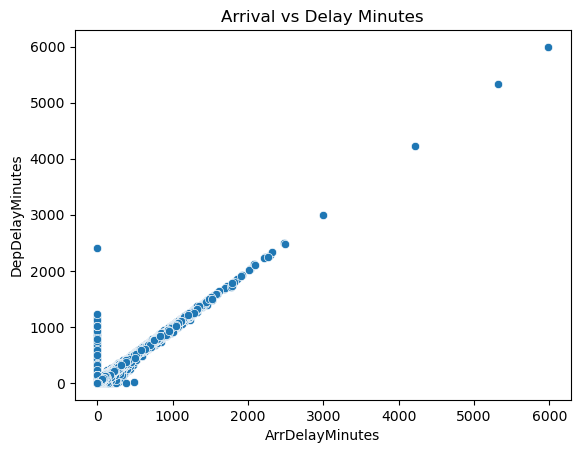

In [ ]:
# analyzing the relationship between arrival delay minutes and departure delay minutes.
sns.scatterplot(data=faa_df, x="ArrDelayMinutes", y="DepDelayMinutes")
plt.title("Arrival vs Delay Minutes")
plt.show()

In [11]:
delays_comp=faa_df[["ArrDelayMinutes","DepDelayMinutes"]]
delays_comp.corr()

,ArrDelayMinutes,DepDelayMinutes
ArrDelayMinutes,1.00000,0.97381
DepDelayMinutes,0.97381,1.00000


## Delay Reason Exploration
Exploring the shape and distribution of each delay reason

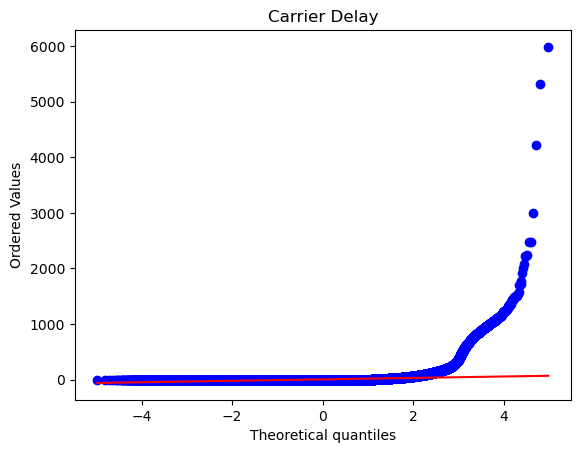

In [10]:
import scipy.stats as stats
Carrier_Data=delay_data["CarrierDelay"]
stats.probplot((Carrier_Data), dist="norm", plot=plt)
plt.title("Carrier Delay")
plt.show()

In [14]:
(delay_data["CarrierDelay"]>0.0).value_counts()

CarrierDelay
False    1872640
True      314921
Name: count, dtype: int64

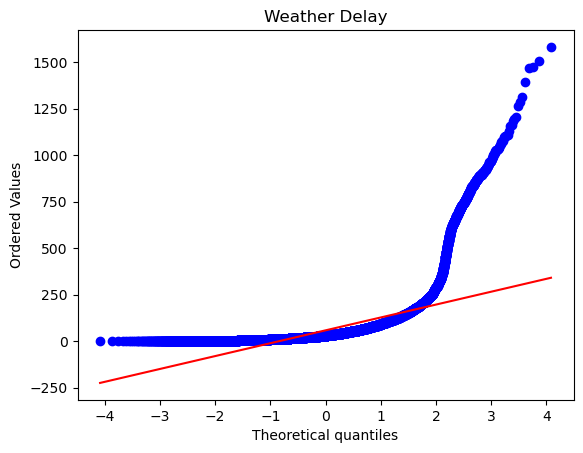

In [15]:
WeatherDelay=delay_data[delay_data["WeatherDelay"]>0]["WeatherDelay"]
stats.probplot(WeatherDelay, dist="norm", plot=plt)
plt.title("Weather Delay")
plt.show()

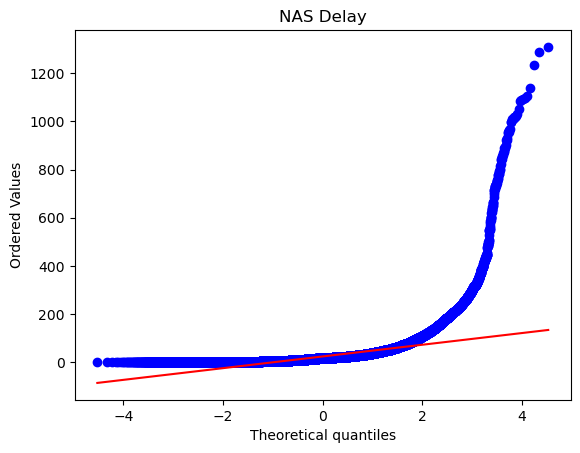

In [16]:
stats.probplot((delay_data[delay_data["NASDelay"]>0]["NASDelay"]), dist="norm", plot=plt)
plt.title("NAS Delay")
plt.show()

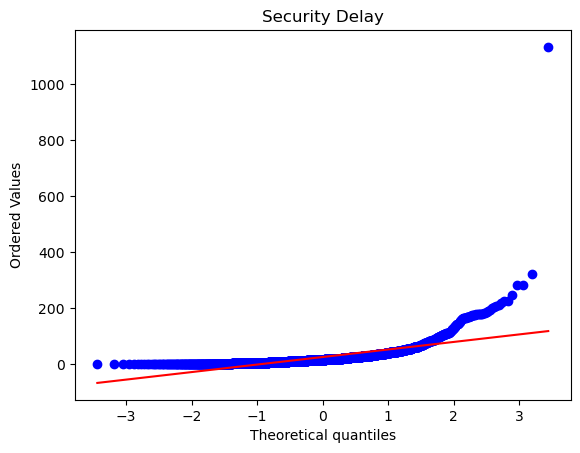

In [17]:
stats.probplot((delay_data[delay_data["SecurityDelay"]>0]["SecurityDelay"]), dist="norm", plot=plt)
plt.title("Security Delay")
plt.show()

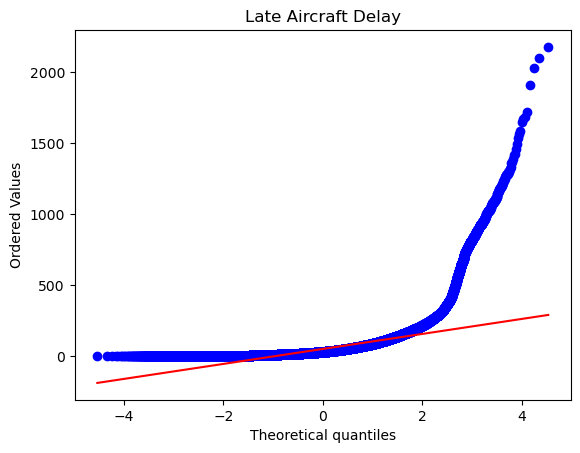

In [18]:
stats.probplot((delay_data[delay_data["LateAircraftDelay"]>0]["LateAircraftDelay"]), dist="norm", plot=plt)
plt.title("Late Aircraft Delay")
plt.show()

In [19]:
def delay_summary(delay_reason):
    return delay_data[delay_data[delay_reason]>0][delay_reason].describe()
delay_summary("CarrierDelay")


count    314921.000000
mean         40.075032
std          79.842471
min           1.000000
25%          10.000000
50%          20.000000
75%          41.000000
max        5986.000000
Name: CarrierDelay, dtype: float64

In [20]:
delay_summary("WeatherDelay")


count    31045.000000
mean        58.197133
std        101.770754
min          1.000000
25%         14.000000
50%         30.000000
75%         64.000000
max       1582.000000
Name: WeatherDelay, dtype: float64

In [21]:
delay_summary("NASDelay")


count    227076.000000
mean         23.270033
std          34.012326
min           1.000000
25%           6.000000
50%          16.000000
75%          27.000000
max        1310.000000
Name: NASDelay, dtype: float64

In [22]:
delay_summary("SecurityDelay")


count    2378.000000
mean       26.734230
std        38.994461
min         1.000000
25%         9.000000
50%        17.000000
75%        31.000000
max      1132.000000
Name: SecurityDelay, dtype: float64

In [23]:
delay_summary("LateAircraftDelay")

count    239257.000000
mean         51.467844
std          70.959517
min           1.000000
25%          16.000000
50%          31.000000
75%          63.000000
max        2175.000000
Name: LateAircraftDelay, dtype: float64

c:\Users\Yeshu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


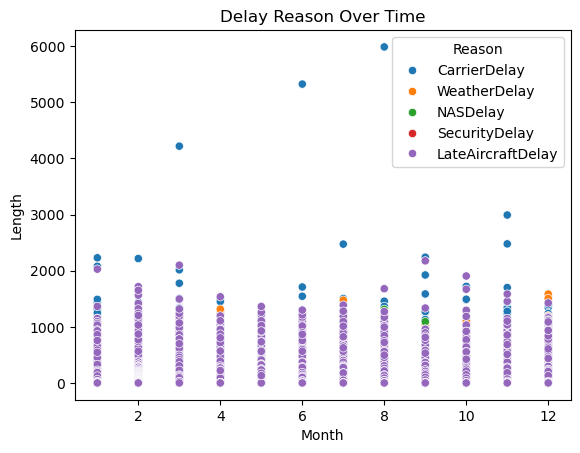

In [24]:
sns.scatterplot(data=delay_long, x="Month",y="Length",hue="Reason")
plt.title("Delay Reason Over Time")
plt.show()

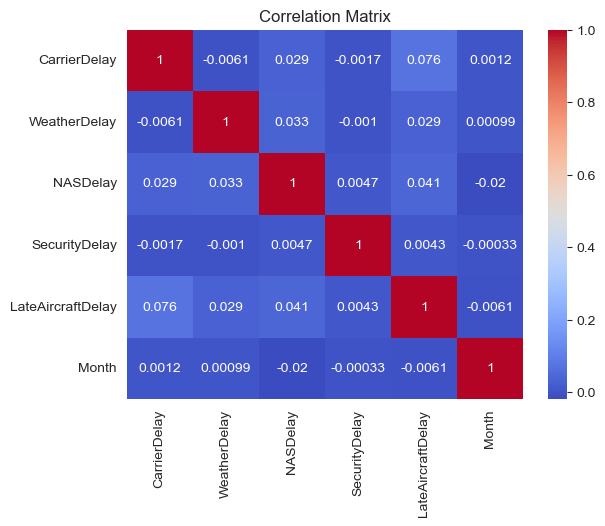

In [ ]:
corr=delay_data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

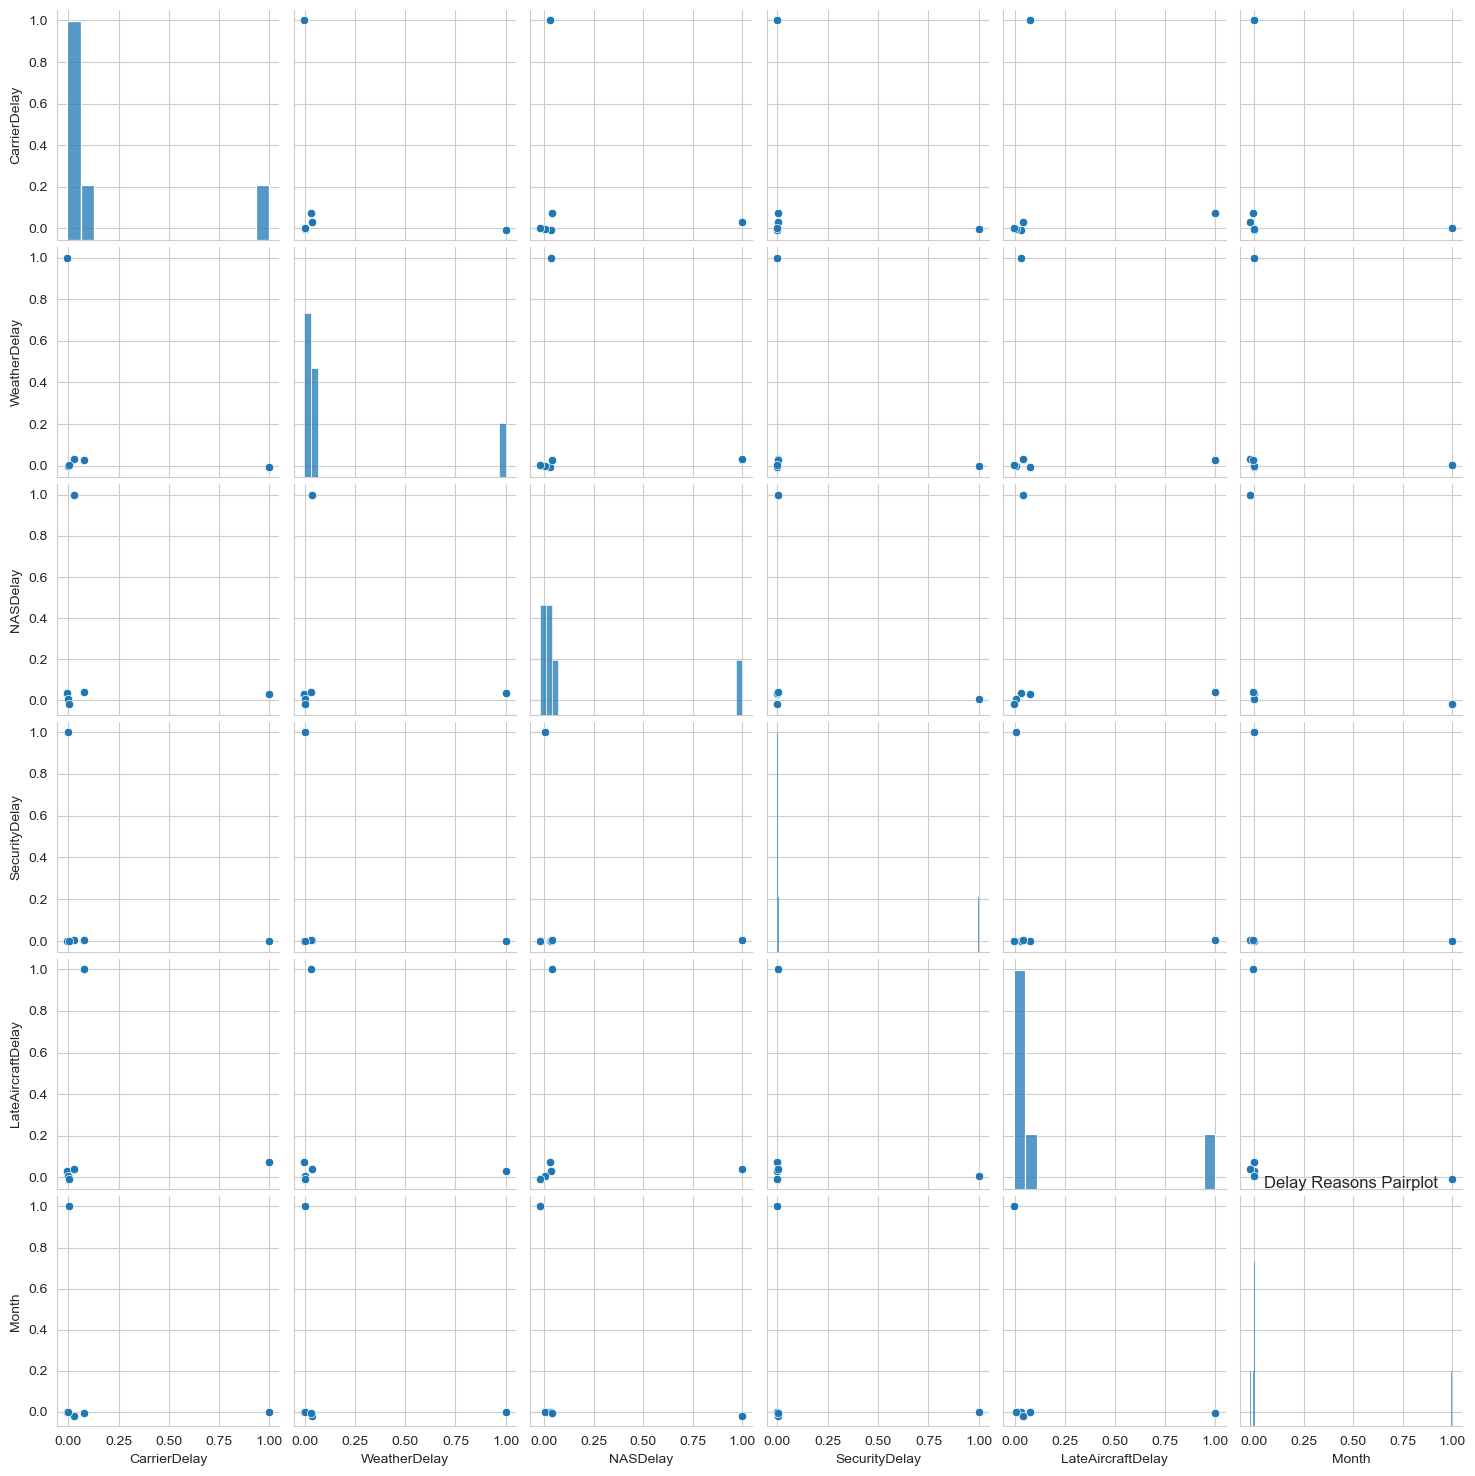

In [ ]:
sns.pairplot(data=corr)
plt.title("Delay Reasons Pairplot")
plt.show()

In [ ]:
delay_data.describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month
count,2.187558e+06,2.187558e+06,2.187558e+06,2.187558e+06,2.187558e+06,2.187558e+06
mean,5.735525e+00,8.098226e-01,2.637600e+00,2.739950e-02,5.776379e+00,6.519542e+00
std,4.277049e+01,1.411979e+01,1.486371e+01,1.842068e+00,3.206681e+01,3.426523e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
max,3.957000e+03,1.520000e+03,1.436000e+03,1.245000e+03,2.530000e+03,1.200000e+01


<Axes: xlabel='Reason', ylabel='Length'>

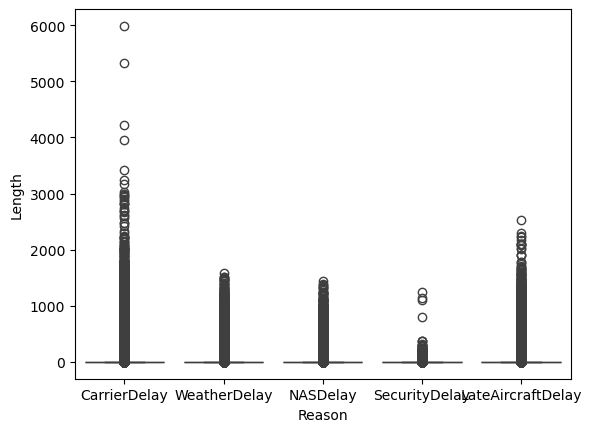

In [ ]:
sns.boxplot(data=delay_long,x="Reason",y="Length")

In [ ]:
delay_data[delay_data["CarrierDelay"]==delay_data["CarrierDelay"].max()]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightDate,Month
1467836,5986.0,0.0,0.0,0.0,0.0,2022-08-07,8


In [ ]:
(delay_long[(delay_long["Reason"]=="CarrierDelay") & (delay_long["Length"]>0)])

,FlightDate,Reason,Length
8,2022-04-03,CarrierDelay,4.0
112,2022-04-03,CarrierDelay,17.0
155,2022-04-03,CarrierDelay,34.0
170,2022-04-03,CarrierDelay,10.0
181,2022-04-03,CarrierDelay,17.0
...,...,...,...
3949482,2022-04-04,CarrierDelay,24.0
3949505,2022-04-04,CarrierDelay,103.0
3949553,2022-04-03,CarrierDelay,65.0
3949554,2022-04-03,CarrierDelay,79.0


In [ ]:
delay_long.dtypes

FlightDate     object
Reason         object
Length        float64
dtype: object

In [ ]:
# seeing how much each delay reason occurs
print(f"The percent of Carrier delay to Total Data is {(len(delay_data[delay_data["CarrierDelay"]!=0])/len(delay_data))*100}")
print(f"The percent of Weather delay to Total Data is {(len(delay_data[delay_data["WeatherDelay"]!=0])/len(delay_data))*100}")
print(f"The percent of NAS delay to Total Data is {(len(delay_data[delay_data["NASDelay"]!=0])/len(delay_data))*100}")
print(f"The percent of Security delay to Total Data is {(len(delay_data[delay_data["SecurityDelay"]!=0])/len(delay_data))*100}")
print(f"The percent of Late Aircraft delay to Total Data is {(len(delay_data[delay_data["LateAircraftDelay"]!=0])/len(delay_data))*100}")

The percent of Carrier delay to Total Data is 14.395987129044629
The percent of Weather delay to Total Data is 1.4191604256978434
The percent of NAS delay to Total Data is 10.380327680005266
The percent of Security delay to Total Data is 0.108705540096939
The percent of Late Aircraft delay to Total Data is 10.937157866683489


In [ ]:
sns.set_style("whitegrid")
delay_long.plot(kind='bar', stacked=True)
plt.show()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000002274F7A93A0>
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\ychiluk\Lib\site-packages\matplotlib\transforms.py", line 195, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
                                                       ^^^^^^
KeyboardInterrupt: 


In [ ]:
reasons=filtered_delay_long[filtered_delay_long["Reason"].isin(["SecurityDelay","CarrierDelay","NASDelay"])]
bar_data= reasons[["Origin","Reason","Length"]]
pivoted_data=bar_data.pivot_table(index="Origin", columns="Reason",values="Length", aggfunc="median", fill_value=0)
pivoted_data["Total"]=pivoted_data.sum(axis=1)
pivoted_data=pivoted_data.sort_values("Total",ascending=True).drop(columns="Total")

<Figure size 1200x600 with 0 Axes>

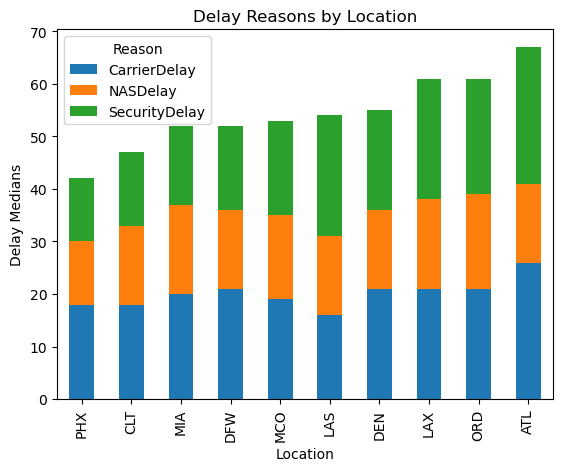

In [ ]:
plt.figure(figsize=(12,6))
pivoted_data.plot(kind="bar", stacked=True)
plt.title("Delay Reasons by Location")
plt.xlabel("Location")
plt.ylabel("Delay Medians (minutes" \
")")
plt.legend(title="Reason")
plt.show()


# Outbound Flights Delays Analysis

In [ ]:
filtered_delay_long= delay_long[delay_long["Length"]>0]
filtered_delay_long["FlightDate"]=pd.to_datetime(filtered_delay_long["FlightDate"], format="%Y-%m-%d")
filtered_delay_long.head()

C:\Users\ychiluk\AppData\Local\Temp\2\ipykernel_19288\640826010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_delay_long["FlightDate"]=pd.to_datetime(filtered_delay_long["FlightDate"], format="%Y-%m-%d")


,FlightDate,Month,Origin,Flights,Reason,Length
85,2022-04-03,4,ORD,1,CarrierDelay,34.0
117,2022-04-02,4,ORD,1,CarrierDelay,65.0
133,2022-04-02,4,DEN,1,CarrierDelay,90.0
136,2022-04-02,4,DEN,1,CarrierDelay,25.0
147,2022-04-02,4,CLT,1,CarrierDelay,1.0


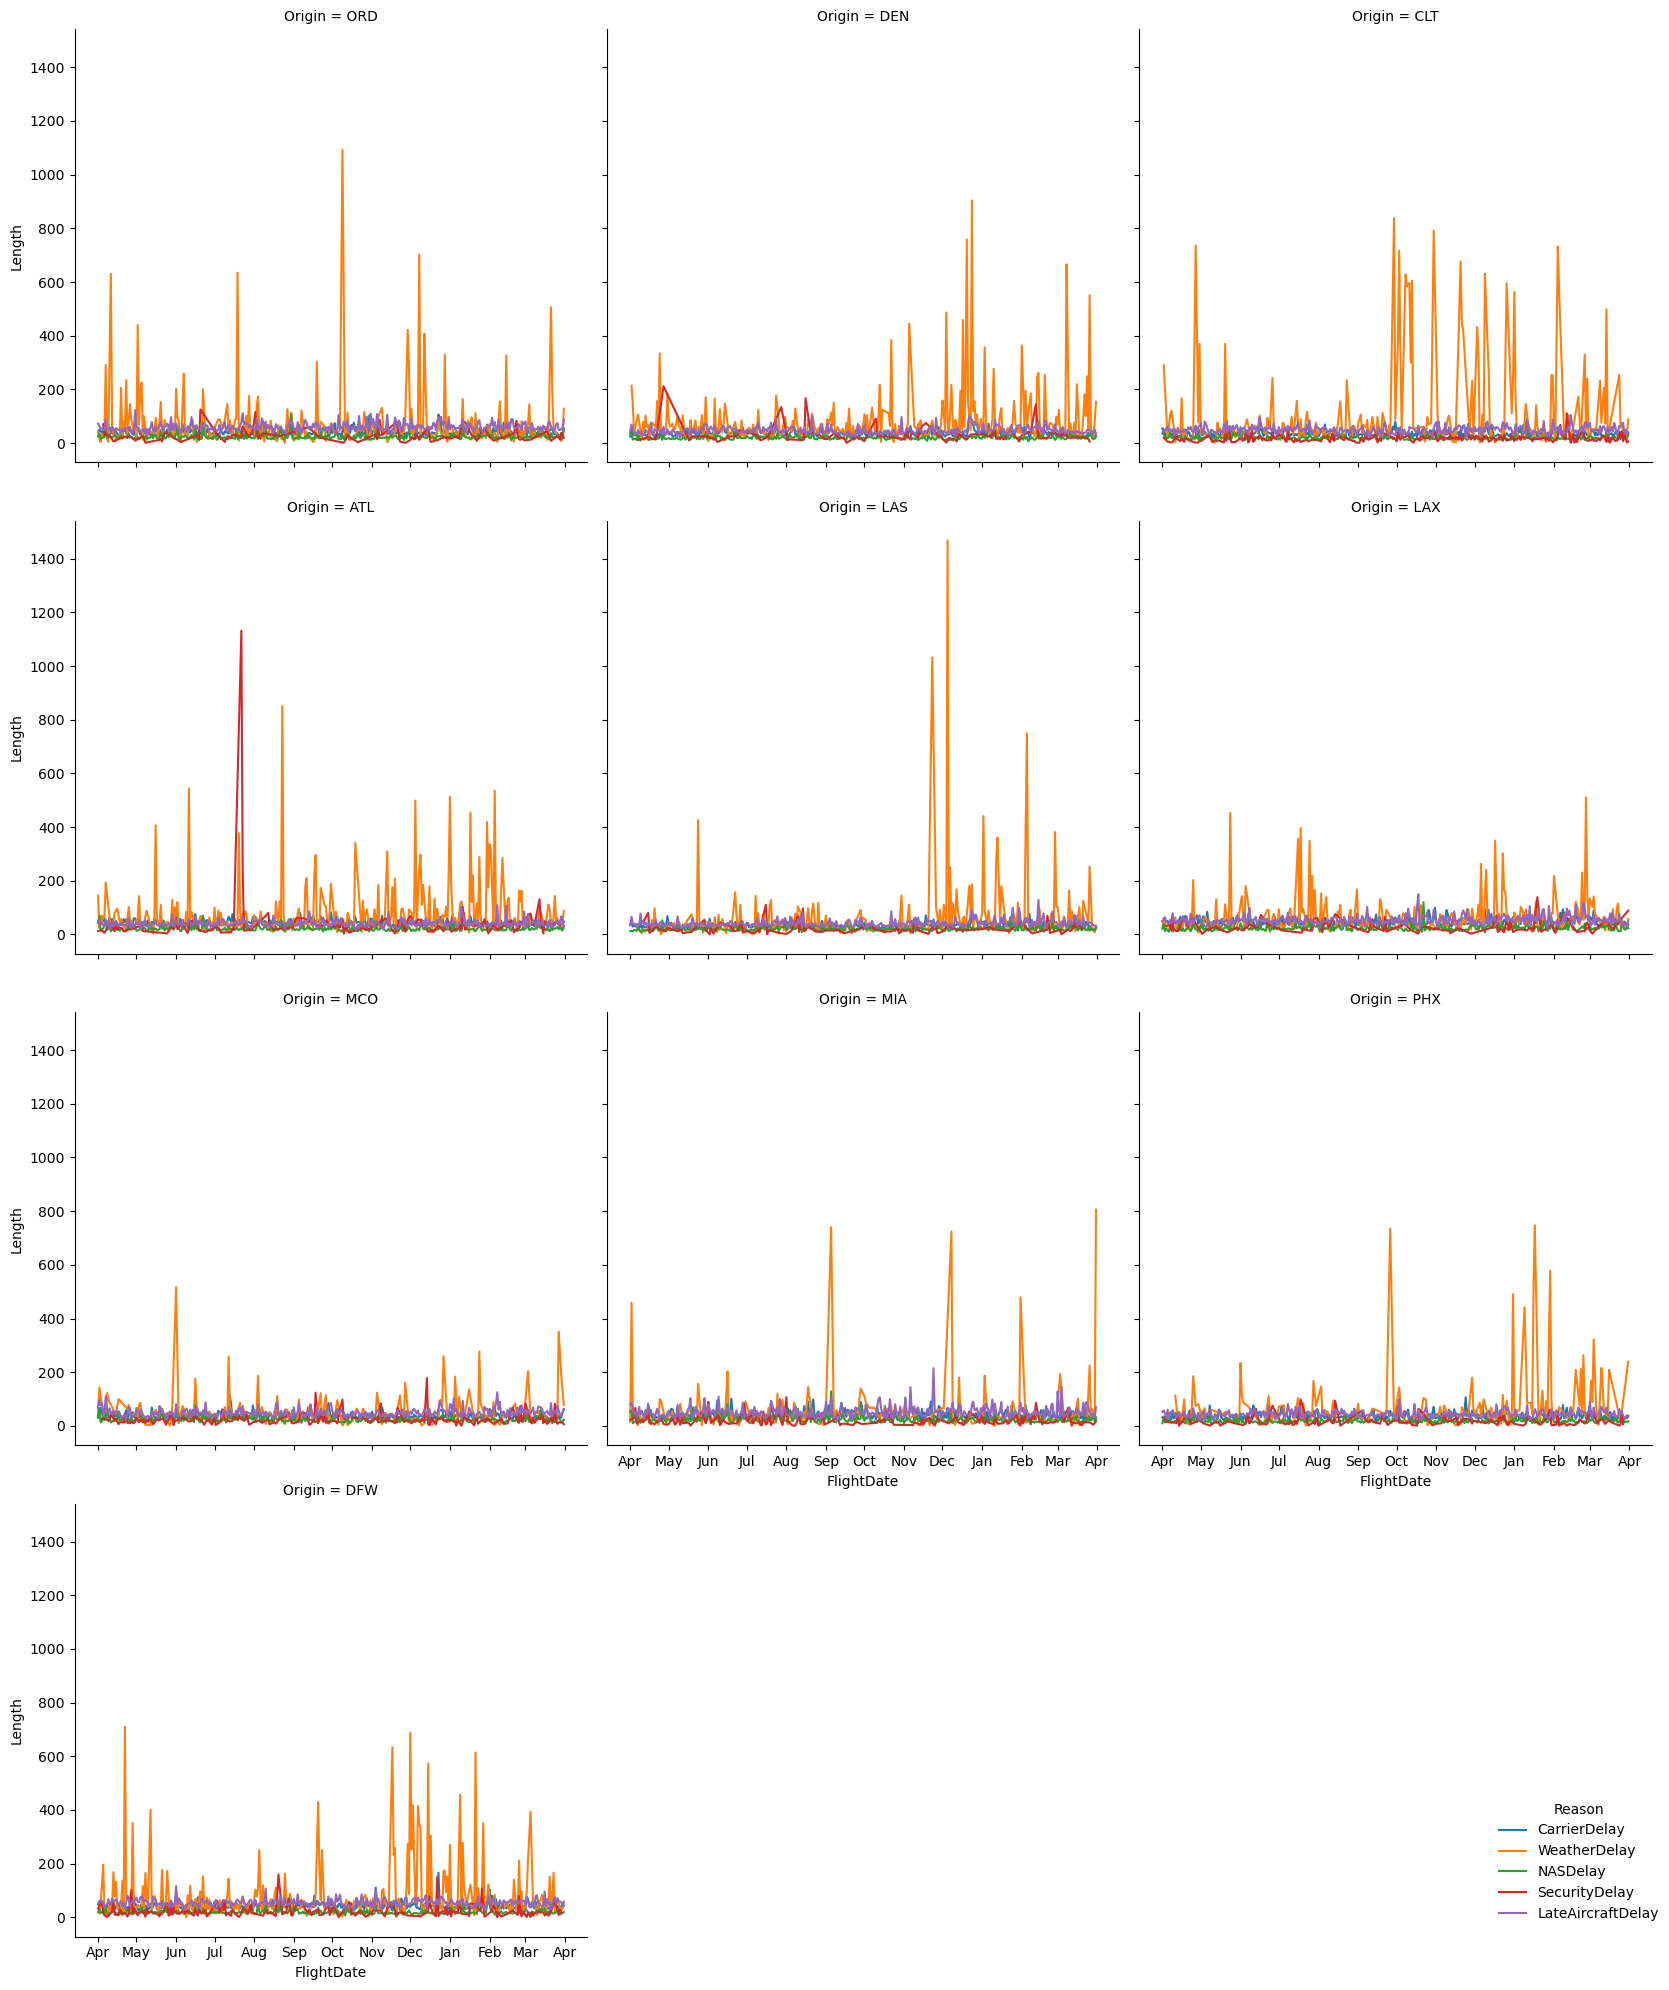

In [ ]:
delays_by_airport=sns.relplot(data=(filtered_delay_long), x="FlightDate", y="Length",hue="Reason",col="Origin", kind="line", col_wrap=3,errorbar=None, estimator="mean")
delays_by_airport._legend.set_bbox_to_anchor((1,0.1))
delays_by_airport._legend.set_loc('upper right')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.tight_layout()
plt.show()

## Kruskal Wallis Analysis
Didn't end up working because the distributions were too similar

In [ ]:
Carrier_groups = [g["Length"].values for name, g in filtered_CarrierDelay.groupby("Origin")]
import scipy
Carrier_kruskal_test_stat, Carrier_kruskal_p_val= scipy.stats.kruskal(*Carrier_groups)
print(f"Kurskal Wallis test {Carrier_kruskal_test_stat:.2f}, and p-value is {Carrier_kruskal_p_val:.2f}")
Carrier_kruskal_p_val

Kurskal Wallis test 4535.40, and p-value is 0.00


np.float64(0.0)

In [ ]:
import scipy as sp
import scikit_posthocs as scp
Carrier_delay_dunn=scp.posthoc_dunn(filtered_CarrierDelay, val_col="Length", group_col="Origin", p_adjust="fdr_bh")
dunn_simplified= Carrier_delay_dunn #<=0.05
print(dunn_simplified)

               ATL           CLT            DEN            DFW            LAS  \
ATL   1.000000e+00  0.000000e+00  3.972715e-212  4.884458e-219   0.000000e+00   
CLT   0.000000e+00  1.000000e+00   4.488660e-77   2.038576e-61   3.903981e-27   
DEN  3.972715e-212  4.488660e-77   1.000000e+00   6.921327e-02  1.476776e-243   
DFW  4.884458e-219  2.038576e-61   6.921327e-02   1.000000e+00  1.639774e-204   
LAS   0.000000e+00  3.903981e-27  1.476776e-243  1.639774e-204   1.000000e+00   
LAX  1.403796e-102  1.906534e-73   2.642063e-03   1.167611e-05  1.277024e-194   
MCO  8.168336e-246  1.232215e-23   1.219519e-13   1.844329e-08  2.069336e-106   
MIA  7.393853e-178  9.778054e-16   1.616848e-11   1.172118e-07   2.745343e-71   
ORD  1.121880e-165  8.007231e-72   4.627926e-01   1.774071e-02  1.454741e-214   
PHX   0.000000e+00  4.944519e-01   6.064776e-70   2.724473e-55   1.518582e-30   

               LAX            MCO            MIA            ORD           PHX  
ATL  1.403796e-102  8.168336

In [ ]:
NAS_groups = [g["Length"].values for name, g in filtered_NASDelay.groupby("Origin")]
import scipy
NAS_kruskal_test_stat, NAS_kruskal_p_val= scipy.stats.kruskal(*NAS_groups)
print(f"Kurskal Wallis test {NAS_kruskal_test_stat:.2f}, and p-value is {NAS_kruskal_p_val:.5f}")

Kurskal Wallis test 2326.17, and p-value is 0.00000


In [ ]:
import scipy as sp
import scikit_posthocs as scp
NAS_delay_dunn=scp.posthoc_dunn(filtered_NASDelay, val_col="Length", group_col="Origin", p_adjust="fdr_bh")
NAS_dunn_simplified= NAS_delay_dunn #<=0.05
print(NAS_dunn_simplified)

               ATL            CLT            DEN            DFW  \
ATL   1.000000e+00   6.933226e-09   2.906602e-02   2.233629e-04   
CLT   6.933226e-09   1.000000e+00   1.615051e-15   1.335589e-02   
DEN   2.906602e-02   1.615051e-15   1.000000e+00   1.575231e-09   
DFW   2.233629e-04   1.335589e-02   1.575231e-09   1.000000e+00   
LAS   1.614666e-06   2.674540e-01   2.259864e-12   1.755975e-01   
LAX   5.551913e-34   5.182673e-64   4.148422e-25   1.110892e-55   
MCO   8.266807e-23   8.745815e-53   9.197950e-15   2.071426e-44   
MIA   4.302156e-49   2.593743e-83   1.549757e-38   7.423107e-75   
ORD  5.818326e-136  1.416864e-198  7.943556e-115  3.685881e-198   
PHX   1.635040e-49   4.868282e-22   1.641392e-62   1.199022e-34   

               LAS            LAX            MCO            MIA  \
ATL   1.614666e-06   5.551913e-34   8.266807e-23   4.302156e-49   
CLT   2.674540e-01   5.182673e-64   8.745815e-53   2.593743e-83   
DEN   2.259864e-12   4.148422e-25   9.197950e-15   1.549757e-

In [ ]:
import scipy as sp
import scikit_posthocs as scp
NAS_delay_dunn=scp.posthoc_dunn(filtered_NASDelay, val_col="Length", group_col="Origin", p_adjust="fdr_bh")
NAS_dunn_simplified= NAS_delay_dunn #<=0.05
print(NAS_dunn_simplified)

               ATL            CLT            DEN            DFW  \
ATL   1.000000e+00   6.933226e-09   2.906602e-02   2.233629e-04   
CLT   6.933226e-09   1.000000e+00   1.615051e-15   1.335589e-02   
DEN   2.906602e-02   1.615051e-15   1.000000e+00   1.575231e-09   
DFW   2.233629e-04   1.335589e-02   1.575231e-09   1.000000e+00   
LAS   1.614666e-06   2.674540e-01   2.259864e-12   1.755975e-01   
LAX   5.551913e-34   5.182673e-64   4.148422e-25   1.110892e-55   
MCO   8.266807e-23   8.745815e-53   9.197950e-15   2.071426e-44   
MIA   4.302156e-49   2.593743e-83   1.549757e-38   7.423107e-75   
ORD  5.818326e-136  1.416864e-198  7.943556e-115  3.685881e-198   
PHX   1.635040e-49   4.868282e-22   1.641392e-62   1.199022e-34   

               LAS            LAX            MCO            MIA  \
ATL   1.614666e-06   5.551913e-34   8.266807e-23   4.302156e-49   
CLT   2.674540e-01   5.182673e-64   8.745815e-53   2.593743e-83   
DEN   2.259864e-12   4.148422e-25   9.197950e-15   1.549757e-

In [ ]:
import scipy as sp
import scikit_posthocs as scp
Security_delay_dunn=scp.posthoc_dunn(filtered_SecurityDelay, val_col="Length", group_col="Origin", p_adjust="fdr_bh")
Security_dunn_simplified= Security_delay_dunn #<=0.05
print(Security_dunn_simplified)

              ATL           CLT       DEN           DFW           LAS  \
ATL  1.000000e+00  6.949213e-12  0.037519  5.720478e-07  8.329168e-01   
CLT  6.949213e-12  1.000000e+00  0.000042  8.882437e-02  1.188836e-14   
DEN  3.751866e-02  4.152994e-05  1.000000  1.368315e-02  3.751866e-02   
DFW  5.720478e-07  8.882437e-02  0.013683  1.000000e+00  5.290941e-08   
LAS  8.329168e-01  1.188836e-14  0.037519  5.290941e-08  1.000000e+00   
LAX  4.782528e-01  4.080654e-08  0.209243  9.176176e-05  5.544131e-01   
MCO  1.899122e-03  1.215843e-06  0.594449  1.264769e-02  7.797599e-04   
MIA  5.720478e-07  1.232638e-01  0.012648  9.206328e-01  5.290941e-08   
ORD  1.421686e-01  8.999650e-05  0.721246  1.217624e-02  1.598418e-01   
PHX  6.660424e-11  4.782528e-01  0.000036  3.854097e-02  1.892398e-12   

              LAX       MCO           MIA       ORD           PHX  
ATL  4.782528e-01  0.001899  5.720478e-07  0.142169  6.660424e-11  
CLT  4.080654e-08  0.000001  1.232638e-01  0.000090  4.78252

# Finding the Which Airports Best Deal With Delays

## Bootstrap

In [ ]:
import numpy as np
import pandas as pd

def boot(x1, x2, direction, alpha):

    x1 = np.array(x1)
    x2 = np.array(x2)

    np.random.seed(8)

    # Bootstrap resampling
    x1_boot = np.random.choice(x1, size = (10000, len(x1)), replace = True)
    x2_boot = np.random.choice(x2, size = (10000, len(x2)), replace = True)

    # Compute bootstrapped differences in medians
    test_boot = np.median(x1_boot, axis = 1) - np.median(x2_boot, axis = 1)

    # Compute p-value and decision
    if direction == 'greater':
        p_value = np.mean(test_boot <= 0)
        result = 'significant' if p_value < alpha else "not significant"
    elif direction == 'less':
        p_value = np.mean(test_boot >= 0)
        result = 'significant' if p_value < alpha else 'not significant'
    elif direction == 'ne':
        p_value = min(2 * min(np.mean(test_boot <= 0), np.mean(test_boot >= 0)),1)
        result = 'significant' if p_value < alpha else 'not significant'
    else: 
        raise ValueError("direction must be 'greater', 'less', or 'ne'")
    
    return result, p_value

In [ ]:
all_flights = pd.read_csv('faa_airports_all_thin.csv')
top_ten_airports = ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'CLT', 'MCO', 'LAS', 'PHX', 'MIA']

### Security Delay

In [ ]:
SecurityDelay_bootstrap = pd.DataFrame(index = top_ten_airports, columns = top_ten_airports)

for airport1 in top_ten_airports:
    for airport2 in top_ten_airports:
        result, p_value = boot(all_flights[(all_flights['Origin'] == airport1) & (all_flights['SecurityDelay'] > 0)]['SecurityDelay'], 
                       all_flights[(all_flights['Origin'] == airport2) & (all_flights['SecurityDelay'] > 0)]['SecurityDelay'],
                       'less',
                       0.022)

        SecurityDelay_bootstrap.loc[airport1, airport2] = p_value

SecurityDelay_bootstrap

,ATL,DFW,DEN,ORD,LAX,CLT,MCO,LAS,PHX,MIA
ATL,0.5494,1.0,0.9949,0.9528,0.8363,1.0,0.9996,0.8562,1.0,1.0
DFW,0.0,0.6221,0.0128,0.0143,0.0103,0.9341,0.0334,0.0001,0.9887,0.9074
DEN,0.0078,0.9981,0.6236,0.2221,0.1471,1.0,0.9257,0.0946,1.0,0.9998
ORD,0.0907,0.9951,0.8646,0.5758,0.3752,1.0,0.945,0.3884,1.0,0.9993
LAX,0.2184,0.9966,0.8812,0.7024,0.5356,1.0,0.9463,0.5487,1.0,1.0
CLT,0.0,0.2249,0.0003,0.0025,0.0007,0.6742,0.0,0.0,0.954,0.6134
MCO,0.0011,0.9972,0.2961,0.0911,0.077,1.0,0.76,0.0083,1.0,1.0
LAS,0.1956,1.0,0.942,0.7135,0.5187,1.0,0.9985,0.5403,1.0,1.0
PHX,0.0,0.0295,0.0002,0.0005,0.0007,0.1222,0.0009,0.0,0.6082,0.1021
MIA,0.0,0.2862,0.0008,0.0036,0.001,0.7488,0.0025,0.0,0.9586,0.6907


In [ ]:
SecurityDelay_bootstrap_r = pd.DataFrame(index = top_ten_airports, columns = top_ten_airports)

for airport1 in top_ten_airports:
    for airport2 in top_ten_airports:
        result, p_value = boot(all_flights[(all_flights['Origin'] == airport1) & (all_flights['SecurityDelay'] > 0)]['SecurityDelay'], 
                       all_flights[(all_flights['Origin'] == airport2) & (all_flights['SecurityDelay'] > 0)]['SecurityDelay'],
                       'less',
                       0.022)

        SecurityDelay_bootstrap_r.loc[airport2, airport1] = result

SecurityDelay_bootstrap_r

,ATL,DFW,DEN,ORD,LAX,CLT,MCO,LAS,PHX,MIA
ATL,not significant,significant,significant,not significant,not significant,significant,significant,not significant,significant,significant
DFW,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
DEN,not significant,significant,not significant,not significant,not significant,significant,not significant,not significant,significant,significant
ORD,not significant,significant,not significant,not significant,not significant,significant,not significant,not significant,significant,significant
LAX,not significant,significant,not significant,not significant,not significant,significant,not significant,not significant,significant,significant
CLT,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
MCO,not significant,not significant,not significant,not significant,not significant,significant,not significant,not significant,significant,significant
LAS,not significant,significant,not significant,not significant,not significant,significant,significant,not significant,significant,significant
PHX,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
MIA,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant


- ATL Significantly less than: None
- DFW significantly less than: ATL, DEN, ORD, LAX, LAS
- DEN Significantly less than: ATL
- ORD Significantly less than: None
- LAX Significantly less than: None
- CLT Significantly less than: ATL, DEN, ORD, LAX, MCO, LAS
- MCO Signficantly less than:  ATL, LAS
- LAS Significantly less than: ATL, DEN, ORD, LAX, MCO, 
- PHX Significantly less than: ATL, DEN, ORD, LAX, MCO, LAS,
- MIA Significantly less than: ATL, DEN, ORD, LAX, MCO, LAS
- Worst to best: ATL ORD LAX (tied), DEN, MCO, LAS DFW, MIA CLT PHX (tied)

1. PHX, CLT,MIA
2. DFW, LAS
3. MCO
4. DEN
5. ATL, ORD, LAX


### NAS Delay

In [ ]:
NASDelay_bootstrap = pd.DataFrame(index = top_ten_airports, columns = top_ten_airports)

for airport1 in top_ten_airports:
    for airport2 in top_ten_airports:
        result, p_value = boot(all_flights[(all_flights['Origin'] == airport1) & (all_flights['NASDelay'] > 0)]['NASDelay'], 
                       all_flights[(all_flights['Origin'] == airport2) & (all_flights['NASDelay'] > 0)]['NASDelay'],
                       'less',
                       0.022)

        NASDelay_bootstrap.loc[airport1, airport2] = p_value

NASDelay_bootstrap

,ATL,DFW,DEN,ORD,LAX,CLT,MCO,LAS,PHX,MIA
ATL,0.9507,1.0,0.9126,0.0,0.0,1.0,0.0496,1.0,1.0,0.0
DFW,0.8618,0.9167,0.8225,0.0,0.0,0.9098,0.0,0.9085,1.0,0.0
DEN,0.954,1.0,0.9156,0.0,0.0,1.0,0.086,1.0,1.0,0.0
ORD,1.0,1.0,1.0,0.9908,1.0,1.0,1.0,1.0,1.0,1.0
LAX,1.0,1.0,1.0,0.0001,1.0,1.0,1.0,1.0,1.0,0.9863
CLT,0.9361,0.9878,0.8966,0.0,0.0,0.9875,0.0,0.9871,1.0,0.0
MCO,1.0,1.0,1.0,0.0,0.0201,1.0,0.9788,1.0,1.0,0.0199
LAS,0.947,0.9998,0.9069,0.0,0.0,0.9998,0.0,0.9998,1.0,0.0
PHX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9225,0.0
MIA,1.0,1.0,1.0,0.0131,1.0,1.0,1.0,1.0,1.0,0.9859


In [ ]:
NASDelay_bootstrap_r = pd.DataFrame(index = top_ten_airports, columns = top_ten_airports)

for airport1 in top_ten_airports:
    for airport2 in top_ten_airports:
        result, p_value = boot(all_flights[(all_flights['Origin'] == airport1) & (all_flights['NASDelay'] > 0)]['NASDelay'], 
                       all_flights[(all_flights['Origin'] == airport2) & (all_flights['NASDelay'] > 0)]['NASDelay'],
                       'less',
                       0.022)

        NASDelay_bootstrap_r.loc[airport2, airport1] = result

NASDelay_bootstrap_r

,ATL,DFW,DEN,ORD,LAX,CLT,MCO,LAS,PHX,MIA
ATL,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,significant,not significant
DFW,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,significant,not significant
DEN,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,significant,not significant
ORD,significant,significant,significant,not significant,significant,significant,significant,significant,significant,significant
LAX,significant,significant,significant,not significant,not significant,significant,significant,significant,significant,not significant
CLT,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,significant,not significant
MCO,not significant,significant,not significant,not significant,not significant,significant,not significant,significant,significant,not significant
LAS,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,significant,not significant
PHX,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
MIA,significant,significant,significant,not significant,not significant,significant,significant,significant,significant,not significant


- ATL significantly less than: ORD, LAX, MIA
- DFW significantly less than: ORD, LAX, MCO, MIA
- DEN significantly less than: ORD, LAX, MIA
- ORD significantly less than: None
- LAX significantly less than: ORD,
- CLT significantly less than: ORD, LAX, MCO, MIA
- MCO significantly less than: ORD, LAX, MIA
- LAS significantly less than: ORD, LAX, MCO, MIA
- PHX significantly less than: ATL, DFW, DEN, ORD, LAX, CLT, MCO, LAS, MIA
- MIA significantly less than: ORD
- Worst to Best: ORD, LAX MIA (tied), MCO DEN ATL(tied), LAS CLT DFW (tied), PHX


1. PHX
2. LAS CLT DFW
3. ATL DEN MCO
4. LAX MIA
5. ORD

In [ ]:
CarrierDelay_bootstrap = pd.DataFrame(index = top_ten_airports, columns = top_ten_airports)

for airport1 in top_ten_airports:
    for airport2 in top_ten_airports:
        result, p_value = boot(all_flights[(all_flights['Origin'] == airport1) & (all_flights['CarrierDelay'] > 0)]['CarrierDelay'], 
                       all_flights[(all_flights['Origin'] == airport2) & (all_flights['CarrierDelay'] > 0)]['CarrierDelay'],
                       'less',
                       0.022)

        CarrierDelay_bootstrap.loc[airport1, airport2] = p_value

CarrierDelay_bootstrap

,ATL,DFW,DEN,ORD,LAX,CLT,MCO,LAS,PHX,MIA
ATL,0.7607,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DFW,0.0,0.9962,1.0,0.8369,0.9904,1.0,1.0,1.0,1.0,1.0
DEN,0.0,0.9805,0.9859,0.819,0.9747,1.0,1.0,1.0,1.0,1.0
ORD,0.0,0.9967,1.0,0.863,0.991,1.0,1.0,1.0,1.0,1.0
LAX,0.0,0.9948,0.9995,0.8307,0.9912,1.0,1.0,1.0,1.0,1.0
CLT,0.0,0.0,0.0,0.0,0.0,0.754,0.4475,1.0,0.999,0.2017
MCO,0.0,0.0,0.0013,0.0,0.0,1.0,0.917,1.0,1.0,0.4549
LAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8815,0.0,0.0
PHX,0.0,0.0,0.0,0.0,0.0,0.5097,0.0019,1.0,0.9986,0.0011
MIA,0.0,0.0,0.0088,0.0,0.0,1.0,0.9656,1.0,1.0,0.7643


In [ ]:
CarrierDelay_bootstrap_r = pd.DataFrame(index = top_ten_airports, columns = top_ten_airports)

for airport1 in top_ten_airports:
    for airport2 in top_ten_airports:
        result, p_value = boot(all_flights[(all_flights['Origin'] == airport1) & (all_flights['CarrierDelay'] > 0)]['CarrierDelay'], 
                       all_flights[(all_flights['Origin'] == airport2) & (all_flights['CarrierDelay'] > 0)]['CarrierDelay'],
                       'less',
                       0.022)

        CarrierDelay_bootstrap_r.loc[airport1, airport2] = result

CarrierDelay_bootstrap_r

,ATL,DFW,DEN,ORD,LAX,CLT,MCO,LAS,PHX,MIA
ATL,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
DFW,significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
DEN,significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
ORD,significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
LAX,significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant,not significant
CLT,significant,significant,significant,significant,significant,not significant,not significant,not significant,not significant,not significant
MCO,significant,significant,significant,significant,significant,not significant,not significant,not significant,not significant,not significant
LAS,significant,significant,significant,significant,significant,significant,significant,not significant,significant,significant
PHX,significant,significant,significant,significant,significant,not significant,significant,not significant,not significant,significant
MIA,significant,significant,significant,significant,significant,not significant,not significant,not significant,not significant,not significant


- ATL significantly less than: None
- DFW significantly less than: ATL, 
- DEN significantly less than: ATL
- ORD significantly less than: ATL, 
- LAX significantly less than: ATL,
- CLT significantly less than: ATL, DFW, DEN, ORD, LAX,
- MCO significantly less than: ATL, DFW, DEN, ORD, LAX,
- LAS significantly less than: ATL, DFW, DEN, ORD, LAX, CLT, MCO, PHX, MIA
- PHX significantly less than: ATL, DFW, DEN, ORD, LAX, MCO, MIA
- MIA significantly less than: ATL, DFW, DEN, ORD, LAX,
- Worst to Best: ATL, DFW, DEN ORD LAX(tied), MCO MIA(tied), CLT, PHX, LAS

### Overall Ranking:
1. PHX
2. CLT
3. DFW & LAS
5. MIA
6. MCO
7. DEN
8. ATL
9. LAX
10. ORD


## Visualizations

### Carrier Delay

C:\Users\Yeshu\AppData\Local\Temp\ipykernel_22108\4075068428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Carrier_medians, x="Origin", y="Length", palette={


Text(0.5, 1.0, 'Median Carrier Delay by Airport')

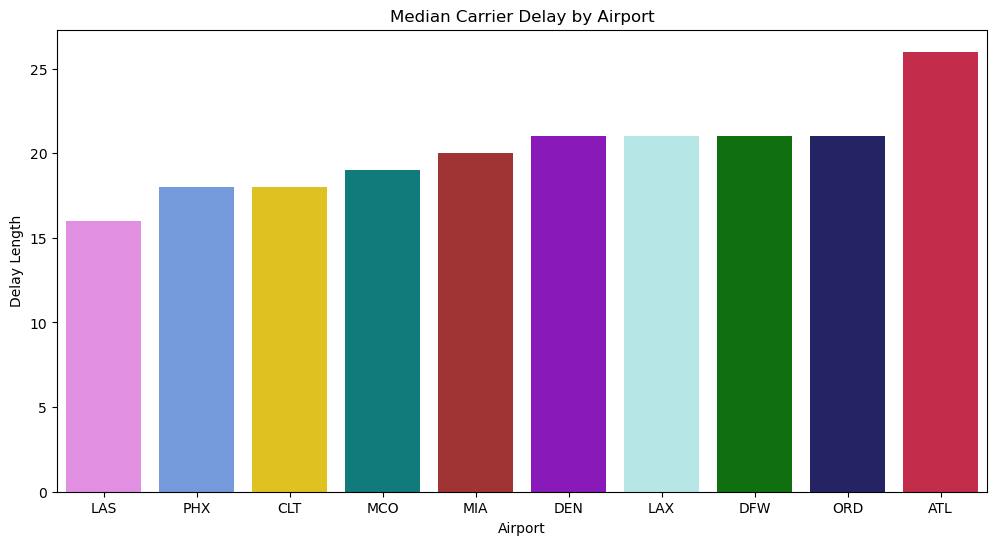

In [12]:
cd_order=["LAS","PHX","CLT","MCO","MIA","DEN","LAX","DFW","ORD","ATL"]
Carrier_medians=filtered_CarrierDelay.groupby("Origin",as_index=False)["Length"].median()
Carrier_medians= Carrier_medians.sort_values("Length", ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=Carrier_medians, x="Origin", y="Length", palette={
        'ATL': 'crimson',
        'DFW': 'green',
        'LAX': 'paleturquoise',
        'CLT': 'gold',
        'PHX': 'cornflowerblue',
        'LAS': 'violet',
        'DEN': 'darkviolet',
        'MIA': 'firebrick',
        'MCO': 'darkcyan',
        'ORD': 'midnightblue'
    }, order=cd_order)
plt.xlabel("Airport")
plt.ylabel("Delay Length")
plt.title("Median Carrier Delay by Airport")

Text(0.5, 1.0, 'Carrier Delay Distribution')

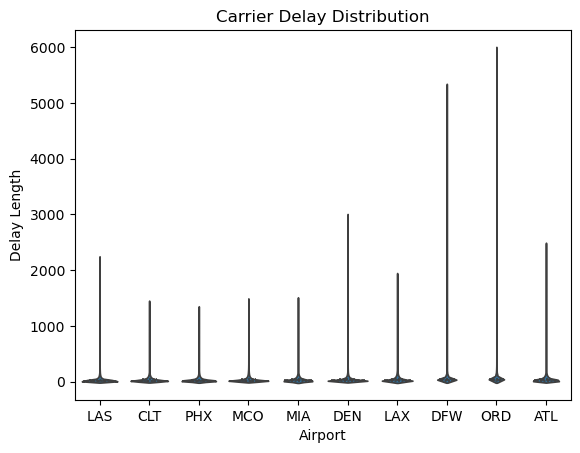

In [ ]:
# threshold is 1.5IQR
sns.violinplot(data=filtered_CarrierDelay,x="Origin", y="Length", inner="quartile", order=Carrier_medians["Origin"])
plt.xlabel("Airport")
plt.ylabel("Delay Length")
plt.title("Carrier Delay Distribution")

In [13]:
def compute_outlier_thresholds(group):
    q1=group['Length'].quantile(0.25)
    q3=group['Length'].quantile(0.75)
    iqr=q3-q1
    upper_bound= q3 +1.5*iqr
    group["outlier"]= group["Length"]>upper_bound
    return group
filtered_CarrierDelay=filtered_CarrierDelay.groupby("Origin", group_keys=False).apply(compute_outlier_thresholds)

filtered_CarrierDelay_m=filtered_CarrierDelay[filtered_CarrierDelay["outlier"]==False]
filtered_CarrierDelay_o=filtered_CarrierDelay[filtered_CarrierDelay["outlier"]==True]
order=filtered_CarrierDelay_m.groupby("Origin")["Length"].median().sort_values(ascending=False).index.tolist()




C:\Users\Yeshu\AppData\Local\Temp\ipykernel_22108\2536956726.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_CarrierDelay=filtered_CarrierDelay.groupby("Origin", group_keys=False).apply(compute_outlier_thresholds)


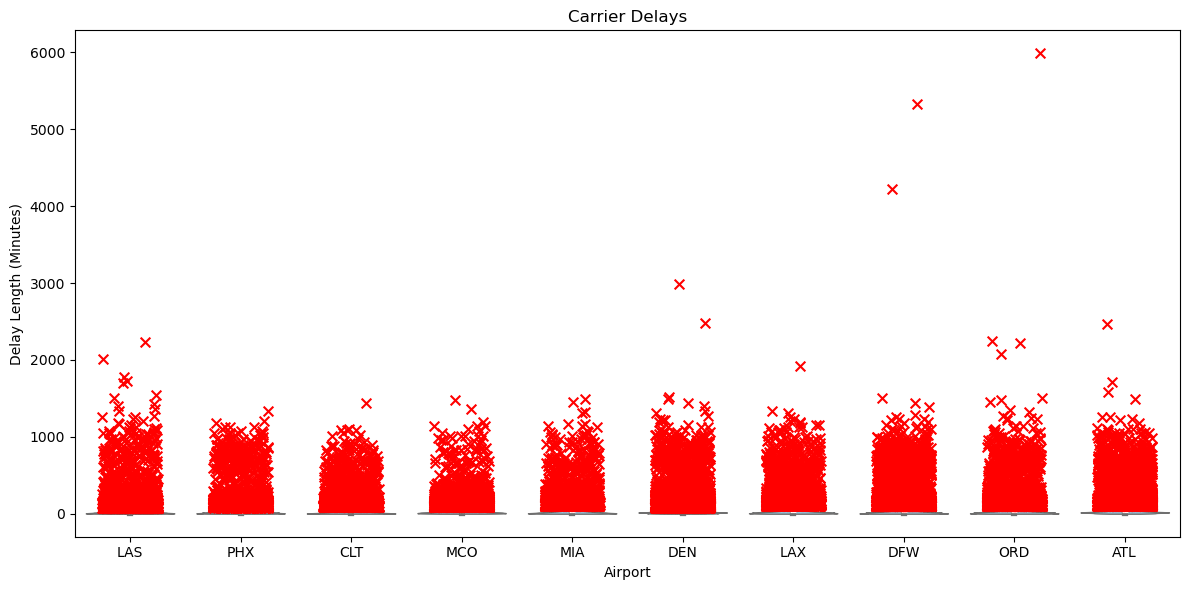

In [14]:
cd_order=["LAS","PHX","CLT","MCO","MIA","DEN","LAX","DFW","ORD","ATL"]
plt.figure(figsize=(12,6))
sns.violinplot(data=filtered_CarrierDelay_m, x="Origin",y="Length",order=cd_order,inner="box", density_norm="width",color="skyblue", cut=0, linewidth=1)
sns.stripplot(data=filtered_CarrierDelay_o, x="Origin",y="Length",order=cd_order,color="red", jitter=0.25, marker="x", size=7, linewidth=1.5, edgecolor="black", zorder=10)
plt.title("Carrier Delays")
plt.ylabel("Delay Length (Minutes)")
plt.xlabel("Airport")
plt.tight_layout()
plt.show()

### NAS Delays

C:\Users\ychiluk\AppData\Local\Temp\2\ipykernel_19288\3030040127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=NAS_medians, x="Origin", y="Length",  order=nd_order, palette={


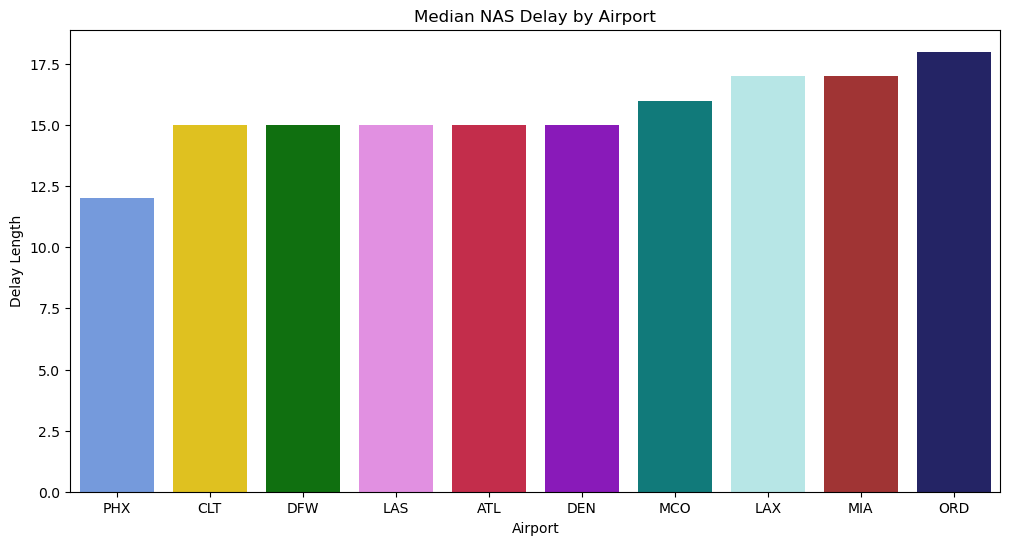

In [ ]:
nd_order=["PHX","CLT","DFW","LAS","ATL","DEN","MCO","LAX","MIA","ORD"]
NAS_medians=filtered_NASDelay.groupby("Origin",as_index=False)["Length"].median()
NAS_medians= NAS_medians.sort_values("Length", ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=NAS_medians, x="Origin", y="Length",  order=nd_order, palette={
        'ATL': 'crimson',
        'DFW': 'green',
        'LAX': 'paleturquoise',
        'CLT': 'gold',
        'PHX': 'cornflowerblue',
        'LAS': 'violet',
        'DEN': 'darkviolet',
        'MIA': 'firebrick',
        'MCO': 'darkcyan',
        'ORD': 'midnightblue'
    })
plt.xlabel("Airport")
plt.ylabel("Delay Length")
plt.title("Median NAS Delay by Airport")
plt.show()

Text(0.5, 1.0, 'NAS Delay Distribution')

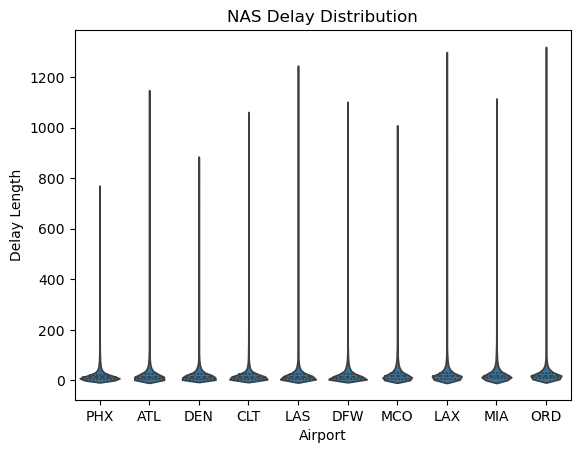

In [ ]:
sns.violinplot(data=filtered_NASDelay,x="Origin", y="Length", inner="quartile", order=NAS_medians["Origin"])
plt.xlabel("Airport")
plt.ylabel("Delay Length")
plt.title("NAS Delay Distribution")

In [15]:
def compute_outlier_thresholds(group):
    q1=group['Length'].quantile(0.25)
    q3=group['Length'].quantile(0.75)
    iqr=q3-q1
    upper_bound= q3 +1.5*iqr
    group["outlier"]= group["Length"]>upper_bound
    return group
filtered_NASDelay=filtered_NASDelay.groupby("Origin", group_keys=False).apply(compute_outlier_thresholds)

filtered_NASDelay_m=filtered_NASDelay[filtered_NASDelay["outlier"]==False]
filtered_NASDelay_o=filtered_NASDelay[filtered_NASDelay["outlier"]==True]
order=filtered_NASDelay_m.groupby("Origin")["Length"].median().sort_values(ascending=False).index.tolist()

C:\Users\Yeshu\AppData\Local\Temp\ipykernel_22108\1811996271.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_NASDelay=filtered_NASDelay.groupby("Origin", group_keys=False).apply(compute_outlier_thresholds)


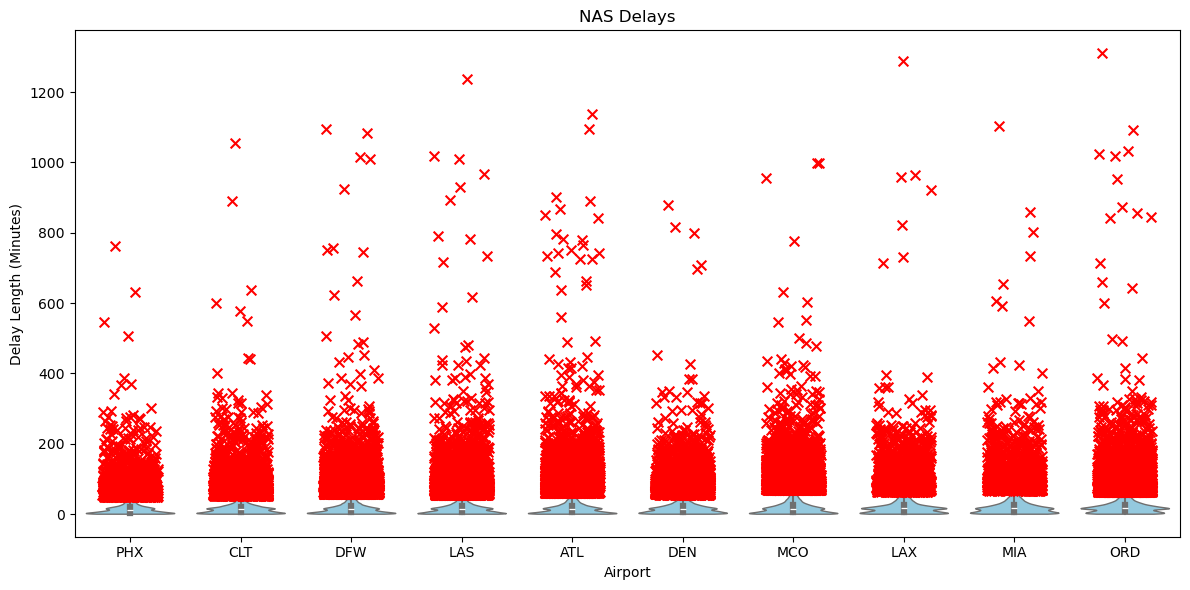

In [16]:
nd_order=["PHX","CLT","DFW","LAS","ATL","DEN","MCO","LAX","MIA","ORD"]
plt.figure(figsize=(12,6))
sns.violinplot(data=filtered_NASDelay_m, x="Origin",y="Length",order=nd_order,inner="box", density_norm="width",color="skyblue", cut=0, linewidth=1)
sns.stripplot(data=filtered_NASDelay_o, x="Origin",y="Length",order=nd_order,color="red", jitter=0.25, marker="x", size=7, linewidth=1.5, edgecolor="black", zorder=10)
plt.title("NAS Delays")
plt.ylabel("Delay Length (Minutes)")
plt.xlabel("Airport")
plt.tight_layout()
plt.show()

### Security Delays

C:\Users\ychiluk\AppData\Local\Temp\2\ipykernel_19288\794384253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Security_medians, x="Origin", y="Length", palette={


Text(0.5, 1.0, 'Median Security Delay by Airport')

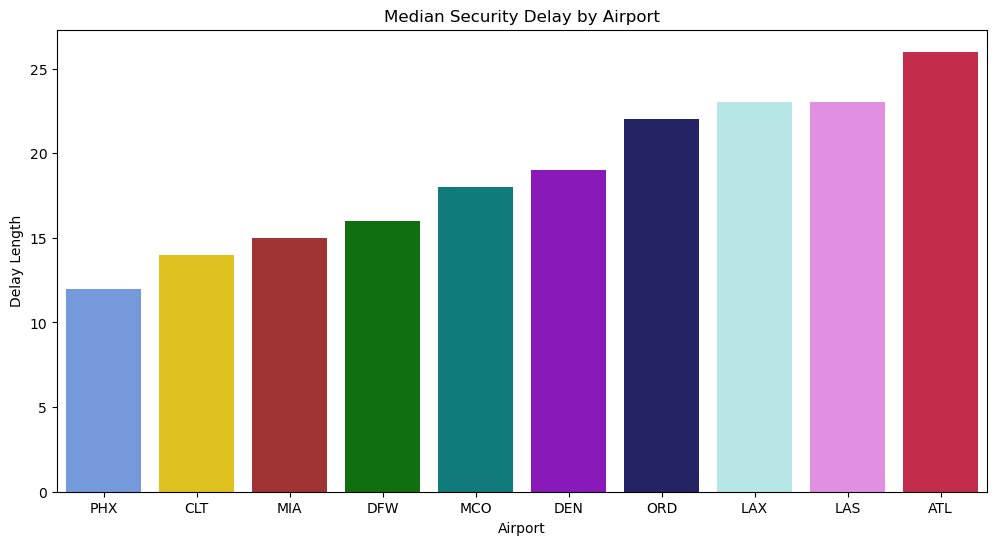

In [ ]:
Security_medians=filtered_SecurityDelay.groupby("Origin",as_index=False)["Length"].median()
Security_medians= Security_medians.sort_values("Length", ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=Security_medians, x="Origin", y="Length", palette={
        'ATL': 'crimson',
        'DFW': 'green',
        'LAX': 'paleturquoise',
        'CLT': 'gold',
        'PHX': 'cornflowerblue',
        'LAS': 'violet',
        'DEN': 'darkviolet',
        'MIA': 'firebrick',
        'MCO': 'darkcyan',
        'ORD': 'midnightblue'
    })
plt.xlabel("Airport")
plt.ylabel("Delay Length")
plt.title("Median Security Delay by Airport")

Text(0.5, 1.0, 'Security Delay Distribution')

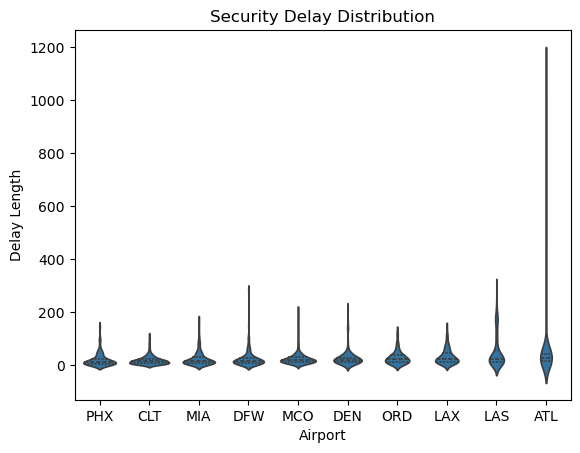

In [ ]:
sns.violinplot(data=filtered_SecurityDelay,x="Origin", y="Length", inner="quartile", order=Security_medians["Origin"])
plt.xlabel("Airport")
plt.ylabel("Delay Length")
plt.title("Security Delay Distribution")

In [ ]:
def compute_outlier_thresholds(group):
    q1=group['Length'].quantile(0.25)
    q3=group['Length'].quantile(0.75)
    iqr=q3-q1
    upper_bound= q3 +1.5*iqr
    group["outlier"]= group["Length"]>upper_bound
    return group
filtered_SecurityDelay=filtered_SecurityDelay.groupby("Origin", group_keys=False).apply(compute_outlier_thresholds)

filtered_SecurityDelay_m=filtered_SecurityDelay[filtered_SecurityDelay["outlier"]==False]
filtered_SecurityDelay_o=filtered_SecurityDelay[filtered_SecurityDelay["outlier"]==True]
#filtered_SecurityDelay_m=filtered_SecurityDelay[filtered_SecurityDelay["Length"]<=2500]
#filtered_SecurityDelay_o=filtered_SecurityDelay[filtered_SecurityDelay["Length"]>=2500]
order=filtered_SecurityDelay_m.groupby("Origin")["Length"].median().sort_values(ascending=False).index.tolist()

C:\Users\ychiluk\AppData\Local\Temp\2\ipykernel_19288\2058963747.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_SecurityDelay=filtered_SecurityDelay.groupby("Origin", group_keys=False).apply(compute_outlier_thresholds)


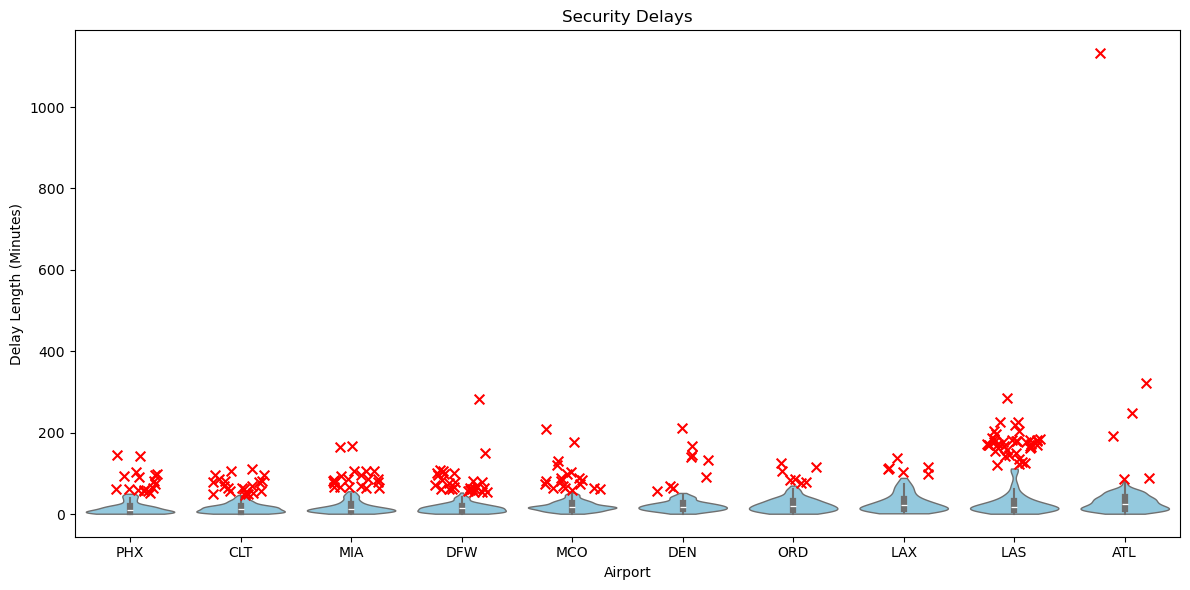

In [ ]:
sd_order=["PHX","CLT","MIA","DFW","MCO","DEN","ORD","LAX","LAS","ATL"]
plt.figure(figsize=(12,6))
sns.violinplot(data=filtered_SecurityDelay_m, x="Origin",y="Length",order=sd_order,inner="box", density_norm="width",color="skyblue", cut=0, linewidth=1)
sns.stripplot(data=filtered_SecurityDelay_o, x="Origin",y="Length",order=sd_order,color="red", jitter=0.25, marker="x", size=7, linewidth=1.5, edgecolor="black", zorder=10)
plt.title("Security Delays")
plt.ylabel("Delay Length (Minutes)")
plt.xlabel("Airport")
plt.tight_layout()
plt.show()